In [1]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
gender_file = "WHO Data Repo Suicide rate estimates age-standardized.csv"
sr_by_gender = pd.read_csv(gender_file)
#sr_by_gender.head()

In [3]:
sr_by_gender = sr_by_gender.rename(columns = {"2016_Age-standardized suicide rates (per 100 000 population)" : "2016",
                                                 "2015_Age-standardized suicide rates (per 100 000 population)" : "2015",
                                                 "2010_Age-standardized suicide rates (per 100 000 population)" : "2010",
                                                 "2000_Age-standardized suicide rates (per 100 000 population)" : "2000"})

sr_by_gender.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [4]:
sr_male = sr_by_gender[sr_by_gender['Sex']==' Male']
sr_male.head()

,Country,Sex,2016,2015,2010,2000
1,Afghanistan,Male,10.6,10.9,12.5,14.3
4,Albania,Male,7.0,6.7,9.5,8.2
7,Algeria,Male,4.9,5.0,5.1,6.7
10,Angola,Male,14.0,14.8,16.7,21.9
13,Antigua and Barbuda,Male,0.0,0.0,0.5,4.3


In [5]:
male_df = sr_male.sort_values(by=['2015', '2010', '2000'], ascending = False)
top_10_sr_male = male_df.head(10)
top_10_sr_male = top_10_sr_male.drop(["Sex","2016"], axis=1)
top_10_sr_male

,Country,2015,2010,2000
289,Lithuania,51.5,56.4,81.7
403,Russian Federation,49.9,62.3,85.8
211,Guyana,46.6,44.9,41.2
256,Kazakhstan,44.2,56.1,63.1
43,Belarus,39.2,58.1,70.4
466,Suriname,38.0,43.7,41.5
511,Ukraine,35.2,41.5,58.1
118,Côte d'Ivoire,31.9,29.1,23.1
157,Equatorial Guinea,31.5,33.0,33.5
394,Republic of Korea,31.4,39.3,20.8


In [6]:
sr_female = sr_by_gender[sr_by_gender['Sex']==' Female']
sr_female.head()

,Country,Sex,2016,2015,2010,2000
2,Afghanistan,Female,2.1,2.1,2.1,1.7
5,Albania,Female,4.3,4.0,6.0,3.6
8,Algeria,Female,1.8,1.8,1.9,2.8
11,Angola,Female,4.6,4.7,5.1,7.2
14,Antigua and Barbuda,Female,0.9,1.6,0.0,0.1


In [7]:
female_df = sr_female.sort_values(by=['2015', '2010', '2000'], ascending = False)
top_10_sr_female = female_df.head(10)
top_10_sr_female = top_10_sr_female.drop(["Sex","2016"], axis=1)
top_10_sr_female


,Country,2015,2010,2000
281,Lesotho,32.1,31.0,30.2
509,Uganda,19.2,22.0,23.9
359,Nigeria,17.6,20.1,20.6
227,India,14.7,15.1,16.1
212,Guyana,14.3,14.1,12.8
98,Chad,14.2,15.9,14.5
434,Sierra Leone,13.9,14.3,16.6
119,Côte d'Ivoire,12.9,11.4,9.1
284,Liberia,12.6,12.7,9.5
395,Republic of Korea,12.5,18.7,8.5


In [8]:
sr_dualsex = sr_by_gender[sr_by_gender['Sex']==' Both sexes']
sr_dualsex.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
3,Albania,Both sexes,5.6,5.3,7.7,5.8
6,Algeria,Both sexes,3.3,3.4,3.5,4.7
9,Angola,Both sexes,8.9,9.3,10.4,13.9
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.2,2.1


In [9]:
dualsex_df = sr_dualsex.sort_values(by=['2015', '2010', '2000'], ascending = False)
top_10_sr_dualsex = dualsex_df.head(10)
top_10_sr_dualsex = top_10_sr_dualsex.drop(["Sex","2016"], axis=1)
top_10_sr_dualsex


,Country,2015,2010,2000
210,Guyana,30.3,29.3,26.7
288,Lithuania,28.8,31.3,46.3
279,Lesotho,28.5,27.6,26.8
402,Russian Federation,27.5,34.5,47.5
255,Kazakhstan,25.2,32.0,34.9
465,Suriname,24.4,28.3,26.4
117,Côte d'Ivoire,22.8,20.7,16.5
156,Equatorial Guinea,22.0,22.2,21.2
393,Republic of Korea,21.4,28.1,14.2
42,Belarus,21.2,31.9,38.7


C:\Users\sjbbh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


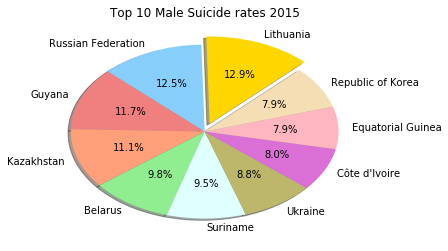

In [10]:
male_sr_size = list(top_10_sr_male["2015"])
labels = list (top_10_sr_male["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (male_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Male Suicide rates 2015")
# Save Figure
plt.savefig("Plots/Top 10 Male_SuicideRate_2015", bbox_inches = 'tight')

# Show Figure
plt.show()

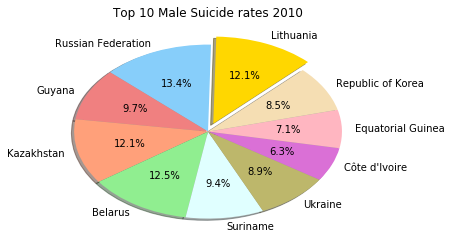

In [11]:
male_sr_size = list(top_10_sr_male["2010"])
labels = list (top_10_sr_male["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (male_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Male Suicide rates 2010")
# Save Figure
plt.savefig("Plots/Top 10 Male_SuicideRate_2010", bbox_inches = 'tight')

# Show Figure
plt.show()

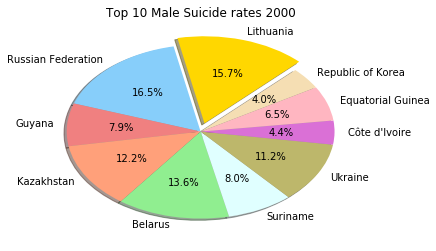

In [12]:
male_sr_size = list(top_10_sr_male["2000"])
labels = list (top_10_sr_male["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (male_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Male Suicide rates 2000")
# Save Figure
plt.savefig("Plots/Top 10 Male_SuicideRate_2000", bbox_inches = 'tight')

# Show Figure
plt.show()

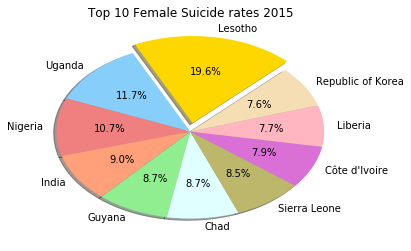

In [13]:
female_sr_size = list(top_10_sr_female["2015"])
labels = list (top_10_sr_female["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (female_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Female Suicide rates 2015")
# Save Figure
plt.savefig("Plots/Top 10 Female_SuicideRate_2015", bbox_inches = 'tight')

# Show Figure
plt.show()

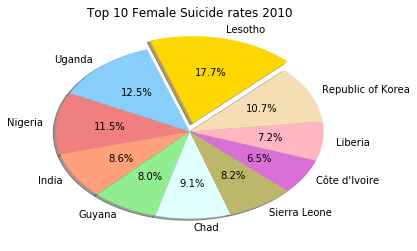

In [14]:
female_sr_size = list(top_10_sr_female["2010"])
labels = list (top_10_sr_female["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (female_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Female Suicide rates 2010")
# Save Figure
plt.savefig("Plots/Top 10 Female_SuicideRate_2010", bbox_inches = 'tight')

# Show Figure
plt.show()

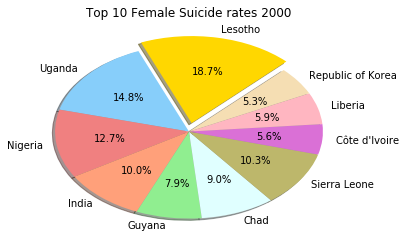

In [15]:
female_sr_size = list(top_10_sr_female["2000"])
labels = list (top_10_sr_female["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (female_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Female Suicide rates 2000")
# Save Figure
plt.savefig("Plots/Top 10 Female_SuicideRate_2000", bbox_inches = 'tight')

# Show Figure
plt.show()

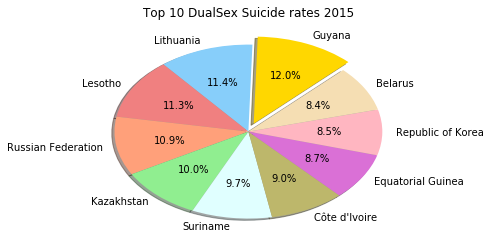

In [16]:
dualsex_sr_size = list(top_10_sr_dualsex["2015"])
labels = list (top_10_sr_dualsex["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (dualsex_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 DualSex Suicide rates 2015")
# Save Figure
plt.savefig("Plots/Top 10 DualSex Suicide rates 2015", bbox_inches = 'tight')

# Show Figure
plt.show()

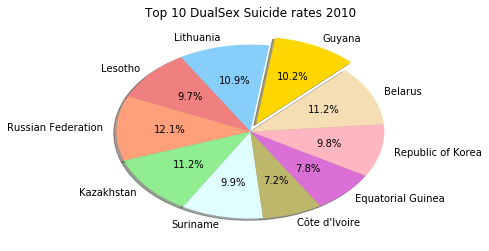

In [17]:
dualsex_sr_size = list(top_10_sr_dualsex["2010"])
labels = list (top_10_sr_dualsex["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (dualsex_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 DualSex Suicide rates 2010")
# Save Figure
plt.savefig("Plots/Top 10 DualSex Suicide rates 2010", bbox_inches = 'tight')

# Show Figure
plt.show()

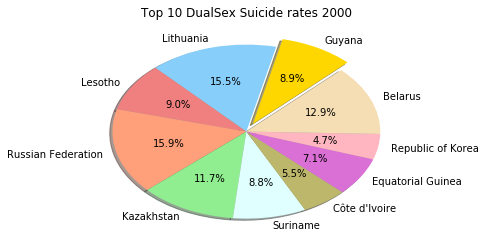

In [18]:
dualsex_sr_size = list(top_10_sr_dualsex["2000"])
labels = list (top_10_sr_dualsex["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie (dualsex_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 DualSex Suicide rates 2000")
# Save Figure
plt.savefig("Plots/Top 10 DualSex Suicide rates 2000", bbox_inches = 'tight')

# Show Figure
plt.show()